In [1]:
#importingrequired modules
import pandas as pd 
import seaborn as sns       
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler
from scipy.stats.mstats import winsorize


In [2]:
#loading dataset
df = pd.read_csv('./datasets/titanic.csv')

In [3]:
#overviewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking number of null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#checking the shape(dimensions) of dataset
df.shape

(891, 12)

In [6]:
#dropping cabin column as it contatins too many null values and may be 
df.drop(columns=['Cabin'],axis=1,inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
#filling missing values of age with median
df['Age'] = df['Age'].fillna(df['Age'].median())
# df.isnull().sum()
# df['Age'].unique()

<Axes: xlabel='Age', ylabel='Count'>

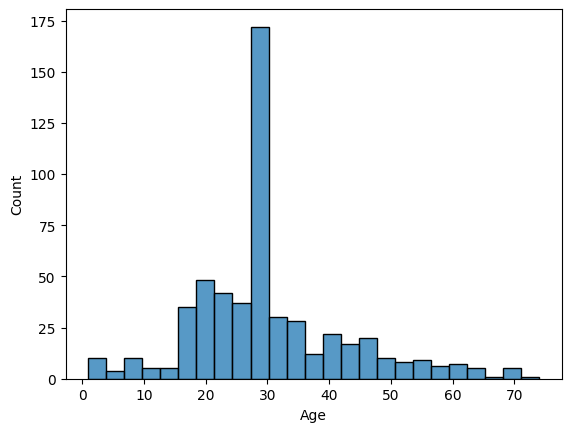

In [8]:
# Number of not survived
not_survived_index = df['Survived'] ==False
not_survived = df.loc[not_survived_index]
not_survived_age = not_survived['Age']
# not_survived_age
sns.histplot(not_survived_age)

<Axes: xlabel='Age', ylabel='Count'>

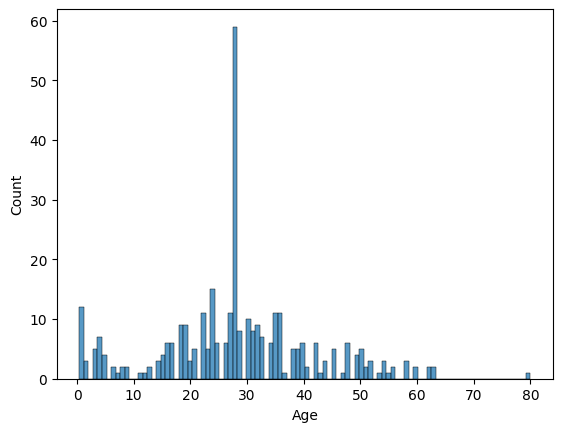

In [9]:
# Number of not survived
survived_index = df['Survived'] ==True
survived = df.loc[survived_index]
survived_age = survived['Age']
sns.histplot(survived_age,bins=100)

<Axes: xlabel='Age', ylabel='Count'>

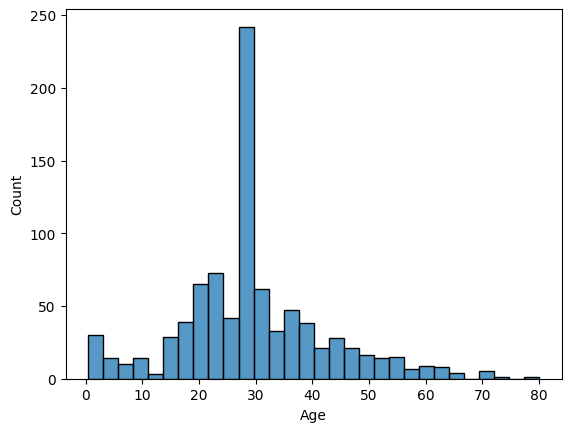

In [10]:
#comparing ages with no of peeople on board
# df.isnull().sum()
sns.histplot(df['Age'])

<Axes: xlabel='Embarked', ylabel='Count'>

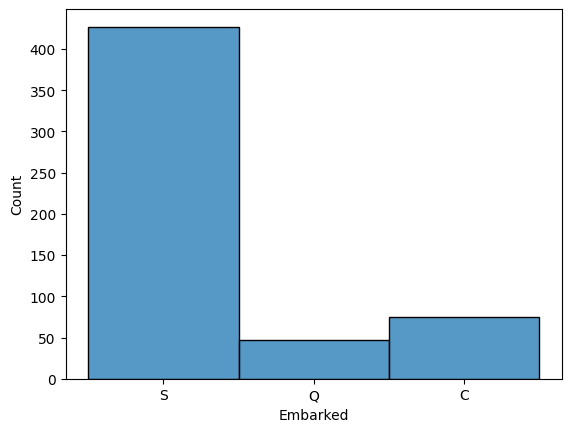

In [11]:
# comparission of embarked with survival
survived_index = df['Survived'] ==True
survived = df.loc[not_survived_index]
survived_embark = not_survived['Embarked']
sns.histplot(survived_embark,bins=100)

<Axes: xlabel='Embarked', ylabel='Count'>

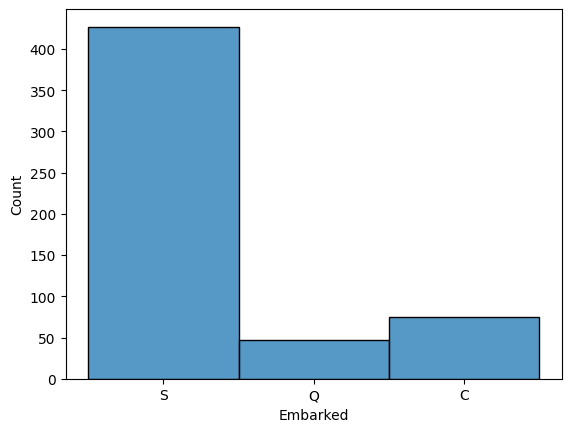

In [12]:
# comparission of embarked with !survival
survived_index = df['Survived'] ==False
survived = df.loc[not_survived_index]
survived_embark = not_survived['Embarked']
sns.histplot(survived_embark,bins=100)

In [13]:
#removing records with null values of embarked column
df = df.dropna(subset = ['Embarked'])
# df.head()

In [14]:
#Encoding column sex with LabelEncoder
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
# df

/tmp/ipykernel_55970/4189758921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = LabelEncoder().fit_transform(df['Sex'])


In [15]:
# Embarked_C is a reference column and theref has been dropped
#OneHotEncoding on embarked column
df = pd.get_dummies(df,columns=['Embarked'],drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


In [3]:
#handling outliers in fare column 
# Q1 = df['Fare'].quantile(.25)
# Q3 = df['Fare'].quantile(.75)
# IQR = Q3-Q1
# upper_limit = Q3 =(1.5*IQR)
# # upper_limit is 34.6563
# df['Fare'] = df["Fare"].clip(upper = upper_limit)


# due to some people with 0 fare I may need to winsorize fare column

df["Fare"] = winsorize(df['Fare'],limits=[.05,.05])

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#scaling numerical values
df[['Age','Fare']] = MinMaxScaler().fit_transform(df[['Age','Fare']])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.000236,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.604039,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.006601,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.432579,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.007779,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0.334004,0,0,211536,0.054455,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0.233476,0,0,112053,0.214757,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,0.152994,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0.321438,0,0,111369,0.214757,C148,C


In [18]:
#Creating new feature 'Falmilysize' from parch and sibSp column
df['FamilySize'] = df['Parch'] + df['SibSp']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.209197,False,True,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,1.000000,False,False,1
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.228674,False,True,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,1.000000,False,True,1
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.232281,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0.334004,0,0,211536,0.375112,False,True,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,0.233476,0,0,112053,0.865643,False,True,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,0.346569,1,2,W./C. 6607,0.676645,False,True,3
889,890,1,1,"Behr, Mr. Karl Howell",1,0.321438,0,0,111369,0.865643,False,False,0


In [6]:
# 15 individuals with 0 fare could possibly be an outlier or some specials
small_fare_index = df['Fare']<0.01
df.loc[small_fare_index]
#therefore I may not drop there records

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.000236,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.006601,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.007779,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,0.246042,0,0,A/5. 2151,0.007779,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,0.170646,0,0,350406,0.005933,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,0.233476,0,0,349212,0.006325,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,0.006325,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,0.409399,0,0,349257,0.006325,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,0.308872,0,0,SOTON/OQ 392076,0.000000,NaN,S


In [20]:
df.to_csv('./datasets/filtered_datasets/titanic.csv')